# Unsupervised Learning Techniques
Learning where we have the input data $\mathbf{x}$ but do not have the labels $\mathbf{y}$. Some examples of common *unsupervised learning* tasks:
* *clustering* - grouping similar instances together into *clusters*
* *anomaly* detection - learinig what "normal" data look like and distinguisting abnormal instances
* *dimensionality-reduction* - reducing the dimension of the inputs
* *density estimation* - estimating the *probability density function (PDF)*

## Clustering
This task is just like classification (each instance is assigned to a group) but without class labels.

Example applications:
* data analysis
* dimensionality reduction technique
* outlier detection
* semi-supervised learning
* search engines
* image segmentation
* customer segmentation

### K-Means
*K-means* is a simple iterative clustering algorithm. It is fast and usually pretty good in practice. 

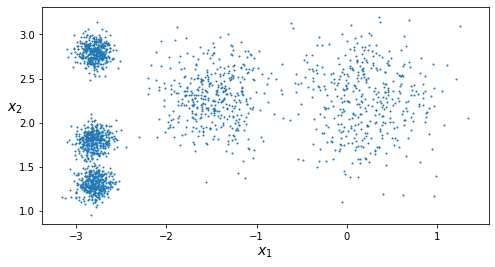

In [1]:
# FIXME: meke autocompletion working again
%config Completer.use_jedi = False

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

np.random.seed(42)

# Create blobs dataset
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]],
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(
    n_samples=2000,
    centers=blob_centers,
    cluster_std=blob_std,
    random_state=7,
)


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

    
# Plot the dataset
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [2]:
from sklearn.cluster import KMeans

k = 5

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [3]:
y_pred is kmeans.labels_

True

In [4]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [5]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

#### Decision Boundaries

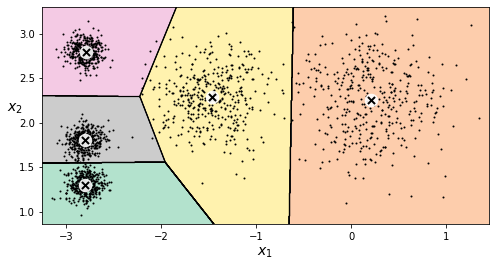

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=30, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, linewidths=2, color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

#### Hard Clustering vs Soft Clustering
* **hard clustering** - assign each instance to exactly one cluster
* **soft clustering** - give each instance a score per cluster (can be distance to cluster centroid or similarity score/affinity - e.g. a RBF)

In *Scikit-Learn*,  `KMeans`' `transform` method measures the distance from each instance to every centroid. 

In [8]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In [9]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

#### K-Means Algorithm
1. Initialize $k$ cluster centroids ($k$ distinct instances are picked from the dataset at random as the initial cluster centroids)
1. Repeat until convergence (e.g. until centroids stop moving):
  1. Assign each instance to the closest centroid (based on some measure)
  1. Update the centroids to be the mean of instances that are assigned to them
  
Computational complexity of *K-means* is generaly linear w.r.t. number of instances, clusters and features ($m$, $k$, $n$) **if** the data has a clustering structure. If it doesn't then the worst case scenario is exponential w.r.t. $m$ - in practice this does not happen and *k-means* is really fast clustering algorithm.

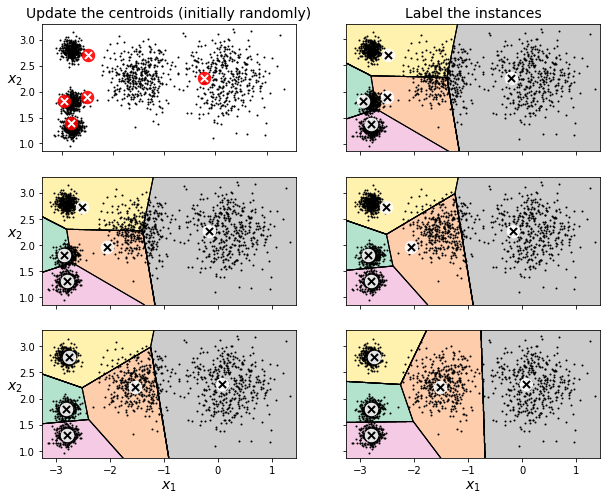

In [10]:
def fit_kmeans(X, max_iter):
    # Manually set these hyperparameters - `KMeans` by default uses an optimized algorithm
    kmeans = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", max_iter=max_iter, random_state=1)
    return kmeans.fit(X)


kmeans_iter1 = fit_kmeans(X, max_iter=1)
kmeans_iter2 = fit_kmeans(X, max_iter=2)
kmeans_iter3 = fit_kmeans(X, max_iter=3)

plt.figure(figsize=(10, 8))

# K-means (init)
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

# K-means (iteration 1)
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

# K-means (iteration 2)
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

# K-means (iteration 3)
plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

#### Centroid initialization methods
A big disadvantage of k-means is it's sensitivity to centroid initialization. Depending on the inital step, it may converge to very different (and bad) solutions.

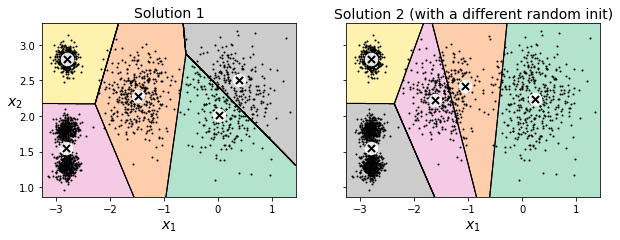

In [11]:
plt.figure(figsize=(10, 3.2))

# Solution 1
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", random_state=11)
kmeans_rnd_init1.fit(X)

plt.subplot(121)
plot_decision_boundaries(kmeans_rnd_init1, X)
plt.title("Solution 1", fontsize=14)

# Solution 2
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", random_state=19)
kmeans_rnd_init2.fit(X)

plt.subplot(122)
plot_decision_boundaries(kmeans_rnd_init2, X, show_ylabels=False)
plt.title("Solution 2 (with a different random init)", fontsize=14)

plt.show()

First option how to tackle this is to initialize the centroids with **good instances** known ahead. This can be easily achieved as follows:
```python
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=k, init=good_init, n_init=1)
```

Another option is to run k-means multiple times (notice `n_init` in examples above) and select the best model based on a performance metric called **inertia** which is the total mean squared distance of all instances to their closest centroid. `KMeans` class keeps track of the best model automatically and stores the best inertia in `inertia_` attribute. It's negative is also returned as the score (negative because better score is higher score).

In [12]:
kmeans.score(X)

-211.59853725816828

An important improvement is a variation called *K-Means++* which uses a smart initialization that tends to select centroids far apart which makes the algorithm less likely to converget to sub-optimal solution (thus reducing the number of restarts needed).

The centroid initialization of this method goes as follows:
1. Take one centroid $\mathbf{c}^{(1)}$ uniformly at random from the dataset
1. Take a new centroid $\mathbf{c}^{(i)}$ using an instance $\mathbf{x}^{(i)}$ selected with probability $D(\mathbf{x}^{(i)})^2 / \sum_{j = 1}^m D(\mathbf{x}^{(i)})^2$ where $D(\mathbf{x}^{(i)})$ is the distance between the instance and the closest centroid that has already been chosen
1. Repeat previous step until $k$ cetroids are selected

`KMeans` class uses this method by default - original algoritm can be forced by `init="random"` (used above - extremely rare in practice).

#### Accelerated K-Means
Another speedup can be achieved by avoiding unnecessary distance calculations. By default `KMeans` uses `algorithm="elkan"` which takes expoits the triangle inequality and tracking of lower and upper distance bounds between instances and centroids. Original approach can again be forced with `algorithm="full"` as shown above (rarely used in practice).

In [13]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

93.7 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [14]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

89.2 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


#### Mini-batch K-Means
This variant of k-means can partially fit the model using mini-batches which
* speeds up the training 3-4x
* allows out-of-core and online learning

In [15]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(X)

minibatch_kmeans.inertia_

211.93186531476786

This class can either be incrementally updated using `partial_fit` or one can use memory-mapped file with `memmap` and regular `fit` (the implementation is smart enough to load only chunks of the dataset into memory).

In [20]:
import os

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Fetch the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
mnist.target = mnist.target.astype(np.int64)

# Split it to training and test sets
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

# Create a memory mapped file of the training dataset
X_mm = np.memmap("/tmp/my_mnist.data", dtype=np.float32, mode="write", shape=X_train.shape)
X_mm[:] = X_train

# Train mini-batch K-Means on the memory-mapped dataset
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

If your data is so large that `memmap` can't be used, one has to do it manually and train using `partial_fit`.

In [21]:
np.random.seed(42)

# Note: This example uses the blobs dataset from above

# Here one would normally load chunks of the dataset from the filesystem or elsewhere
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]


n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

# Best model overall (in terms of inertia)
best_kmeans = None

# Multiple initializations
for init in range(n_init):
    # Initialize new mini-batch k-means model
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    # Load chunks of the dataset and each time partially fit the model
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Keep the model with the lowest inertia
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

# Evaluate the model
best_kmeans.score(X)

-211.70999744411446

In [22]:
%timeit KMeans(n_clusters=k).fit(X)

57.5 ms ± 8.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit MiniBatchKMeans(n_clusters=k).fit(X)

17.8 ms ± 782 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Mini-batch approach is much faster! However, its performance is often lower (higher inertia), and it keeps degrading as $k$ increases.

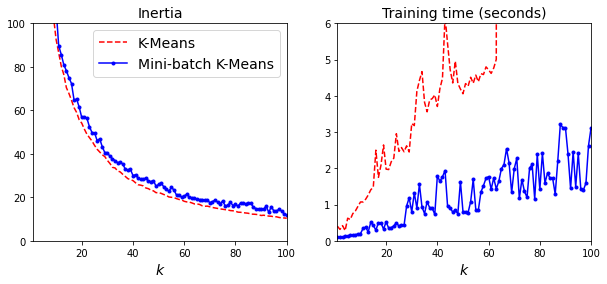

In [24]:
from timeit import timeit

k_max = 100

# Measure learning time and inertia of regular K-Means and mini-batch K-Means for varying k
times = np.empty((k_max, 2))
inertias = np.empty((k_max, 2))
for k in range(1, k_max + 1):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_
    
# Plot the results
plt.figure(figsize=(10,4))

# Inertia vs varying number of clusters
plt.subplot(121)
plt.plot(range(1, k_max + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, k_max + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, k_max, 0, 100])

# Time vs varying number of clusters
plt.subplot(122)
plt.plot(range(1, k_max + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, k_max + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=14)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, k_max, 0, 6])

plt.show()